In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
LABS = {
    "51221": "Hematocrit",
    "51265": "Platelet Count",
    "50912": "Creatinine",
    "50971": "Potassium",
    "51222": "Hemoglobin",
    "51301": "White Blood Cells",
    "51249": "MCHC",
    "51279": "Red Blood Cells",
    "51250": "MCV",
    "51248": "MCH",
    "51277": "RDW",
    "51006": "Urea Nitrogen",
    "50983": "Sodium",
    "50902": "Chloride",
    "50882": "Bicarbonate",
    "50868": "Anion Gap",
    "50931": "Glucose",
    "50960": "Magnesium",
    "50893": "Calcium, Total",
    "50970": "Phosphate",
    "51237": "INR(PT)",
    "51274": "PT",
    "51275": "PTT",
    "51146": "Basophils",
    "51256": "Neutrophils",
    "51254": "Monocytes",
    "51200": "Eosinophils",
    "51244": "Lymphocytes",
    "52172": "RDW-SD",
    "50934": "H",
    "51678": "L",
    "50947": "I",
    "50861": "Alanine Aminotransferase (ALT)",
    "50878": "Asparate Aminotransferase (AST)",
    "50813": "Lactate",
    "50863": "Alkaline Phosphatase",
    "50885": "Bilirubin, Total",
    "50820": "pH",
    "50862": "Albumin",
    "50802": "Base Excess",
    "50821": "pO2",
    "50804": "Calculated Total CO2",
    "50818": "pCO2",
    "52075": "Absolute Neutrophil Count",
    "52073": "Absolute Eosinophil Count",
    "52074": "Absolute Monocyte Count",
    "52069": "Absolute Basophil Count",
    "51133": "Absolute Lymphocyte Count",
    "50910": "Creatine Kinase (CK)",
    "52135": "Immature Granulocytes"
}

In [5]:
df = pd.read_excel(r'/content/drive/MyDrive/Company/Blood Labs/MIMIC Symile Analysis/labs_complete.xlsx')
df.columns = df.columns.str.replace("_percentile", "")
df.columns = df.columns.map(LABS)
df

,NaN,Hematocrit,Platelet Count,Creatinine,Potassium,Hemoglobin,White Blood Cells,MCHC,Red Blood Cells,MCV,...,Lactate,Alkaline Phosphatase,"Bilirubin, Total",pH,Albumin,Base Excess,pO2,Calculated Total CO2,pCO2,Creatine Kinase (CK)
0,12138413,0.653935,0.471492,0.668170,0.122564,0.585660,0.379092,0.273604,0.508236,0.829349,...,0.328330,0.188457,0.750168,0.371901,0.539988,0.660286,0.141536,0.662118,0.722870,0.642922
1,12988457,0.744261,0.549488,0.764983,0.873920,0.600321,0.128942,0.115307,0.782644,0.367417,...,0.557945,0.414605,0.663706,0.807163,0.603970,0.469087,0.234647,0.287035,0.146159,0.226079
2,18624683,0.074887,0.071672,0.197234,0.012156,0.120607,0.564170,0.834371,0.080755,0.603556,...,0.875884,0.103988,0.750168,0.485908,0.374253,0.273487,0.058992,0.287035,0.304645,0.898581
3,11914968,0.870576,0.616041,0.668170,0.122564,0.921972,0.945371,0.875151,0.799719,0.661008,...,0.974600,0.565034,0.396615,0.154482,0.770091,0.108031,0.535329,0.117103,0.471935,0.878056
4,17957742,0.433584,0.264405,0.563640,0.886779,0.430006,0.735389,0.424468,0.512455,0.306750,...,0.119353,0.475349,0.780999,0.872643,0.425130,0.660286,0.916355,0.436496,0.173674,0.886206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,10581271,0.851529,0.936860,0.197234,0.911493,0.799458,0.880900,0.358276,0.885898,0.306750,...,0.735748,0.723036,0.841488,0.807163,0.660628,0.660286,0.538191,0.436496,0.234206,0.343193
359,13724012,0.100652,0.692532,0.834837,0.921640,0.083049,0.620707,0.148654,0.129871,0.423765,...,0.977775,0.987380,0.959450,0.442467,0.323569,0.187239,0.042263,0.186881,0.200969,0.492001
360,17427308,0.588070,0.970488,0.895270,0.900040,0.460534,0.883511,0.104058,0.383889,0.921153,...,0.875884,0.788995,0.841488,0.335876,0.374253,0.273487,0.009905,0.436496,0.615012,0.780260
361,14398566,0.265664,0.099779,0.563640,0.122564,0.412332,0.022997,0.966252,0.499799,0.060767,...,0.221244,0.614841,0.263237,0.485908,0.539988,0.857206,0.893022,0.867929,0.789346,0.338364


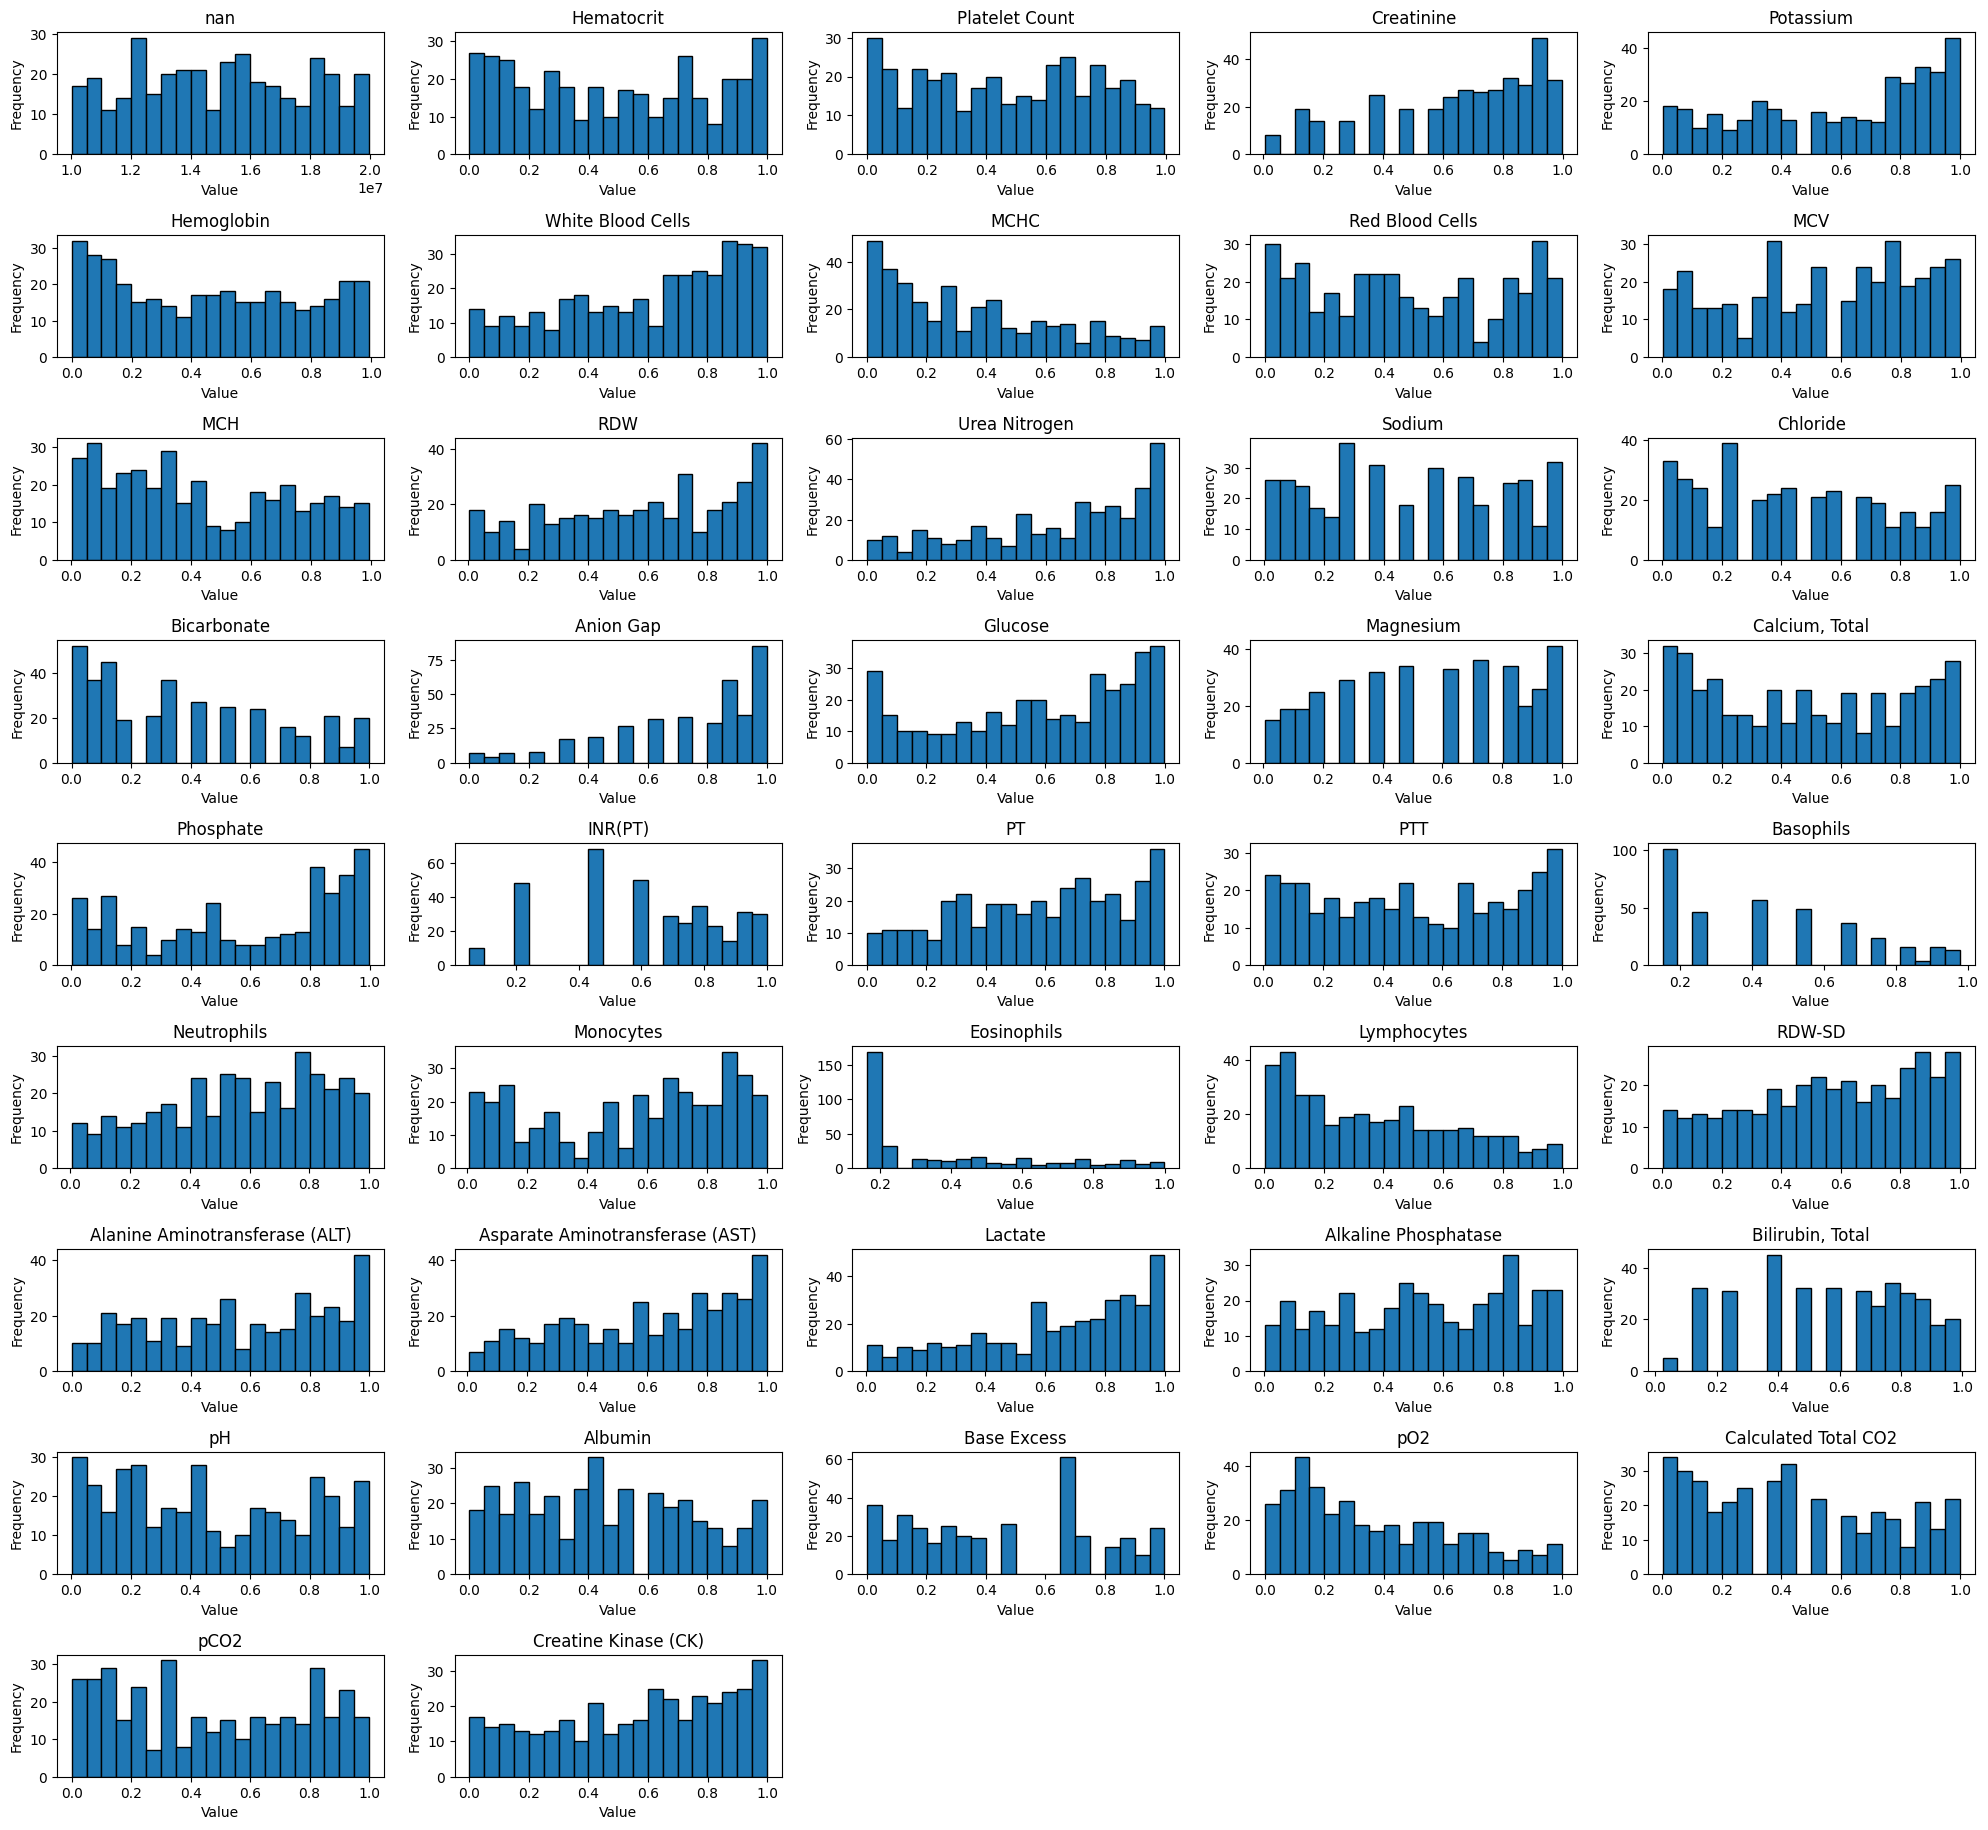

In [13]:
# Step 2: Plot histograms for the sampled columns
plt.figure(figsize=(20, 20))  # Adjust figure size
for i, column in enumerate(df.columns, 1):
    plt.subplot(10, 5, i)  # Create a 2x5 grid of subplots
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
log_list = ['alt', 'aptt', 'ast', 'bun', 'cr', 'crp', 'gluc', 'lac', 'ptinr', 'ptsec', 'sao2', 'tbil', 'wbc']

for item in log_list:

  raw[item] = np.log(raw[item])

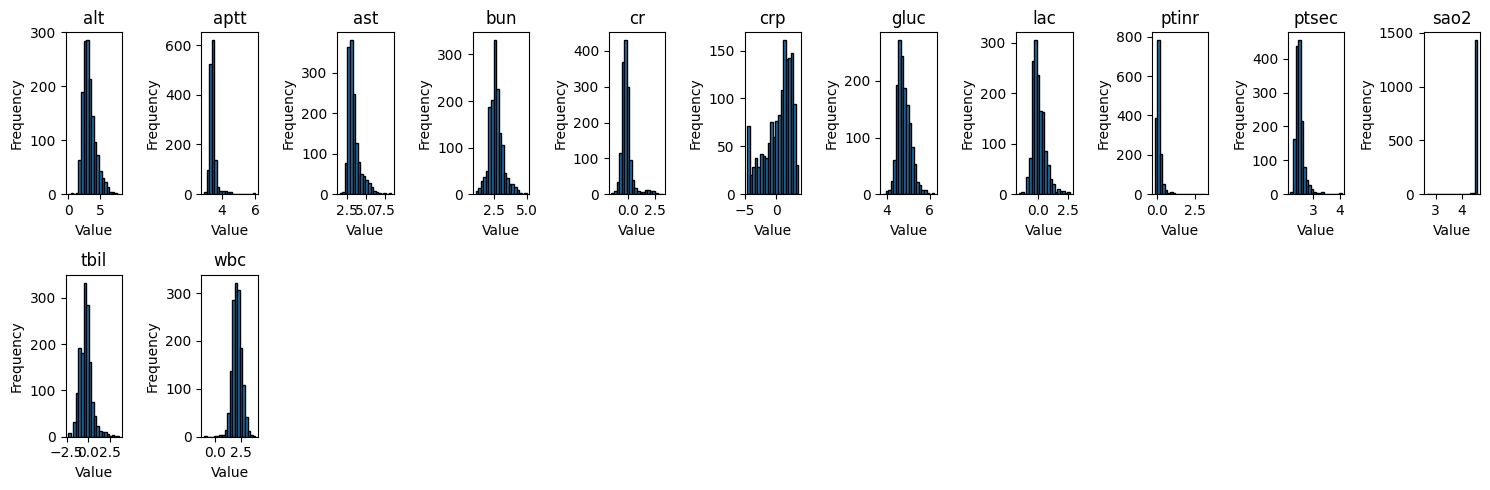

In [ ]:
# Step 1: Randomly sample 10 columns
sampled_columns = raw[log_list] # axis=1 for columns

# Step 2: Plot histograms for the sampled columns
plt.figure(figsize=(15, 5))  # Adjust figure size
for i, column in enumerate(sampled_columns.columns, 1):
    plt.subplot(2, 11, i)  # Create a 2x5 grid of subplots
    plt.hist(sampled_columns[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()